### import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from mod_my_utils.read_write_data import *
from mod_macd_utils.macd import get_macd_signal_line
from mod_macd_utils.macd import get_signal_macd_crossover
from mod_macd_utils.macd import plot_macd_buy_sell

In [3]:
help(get_price_csv)

Help on function get_price_csv in module mod_my_utils.read_write_data:

get_price_csv(folder_name, symbol, index_col)
    Get 'Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'
       
    Parameters
    --------------------------------
    Input Argument: 
    Folder name : Path of the folder where csv file is added
    symbol : name of the stock
    index_col: Column for indexing
    
    Output: 
    Stock data with date as index



### Read data

In [4]:
folder_path = 'data/'
stock_name = 'AAPL'
index_col = 'Date'

In [5]:
stock_data = get_price_csv(folder_name=folder_path,symbol=stock_name, index_col=index_col)

stock name:  AAPL


In [6]:
stock_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2007-12-03,181.86,184.14,177.70,178.8600,34338200.0,0.0,1.0,23.371545,23.664556,22.836927,22.986003,240367400.0
2007-12-04,177.15,180.90,176.99,179.8100,27635700.0,0.0,1.0,22.766244,23.248171,22.745682,23.108091,193449900.0
2007-12-05,182.89,186.00,182.41,185.5000,31871500.0,0.0,1.0,23.503914,23.903592,23.442227,23.839335,223100500.0
2007-12-06,186.19,190.10,186.12,189.9528,32136100.0,0.0,1.0,23.928010,24.430500,23.919014,24.411582,224952700.0
2007-12-07,190.54,194.99,188.04,194.3000,38073800.0,0.0,1.0,24.487046,25.058933,24.165761,24.970258,266516600.0


<AxesSubplot:xlabel='Date'>

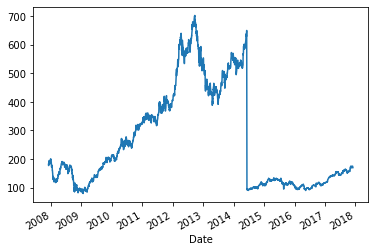

In [7]:
stock_data['Open'].plot()

### Get Relevant data for model development

In [8]:
data = stock_data[["Adj. Close"]].copy()
data.columns = ["price"]
data.head()

,price
Date,
2007-12-03,22.986003
2007-12-04,23.108091
2007-12-05,23.839335
2007-12-06,24.411582
2007-12-07,24.970258


### Get Parameter

In [13]:
short_window = 50
long_window = 100
signal_window = 50


### MACD Signals

In [15]:
macd_signal_line = get_macd_signal_line(data, short_window, long_window, signal_window)
signals = get_signal_macd_crossover(macd_signal_line, long_window)

<AxesSubplot:xlabel='Date'>

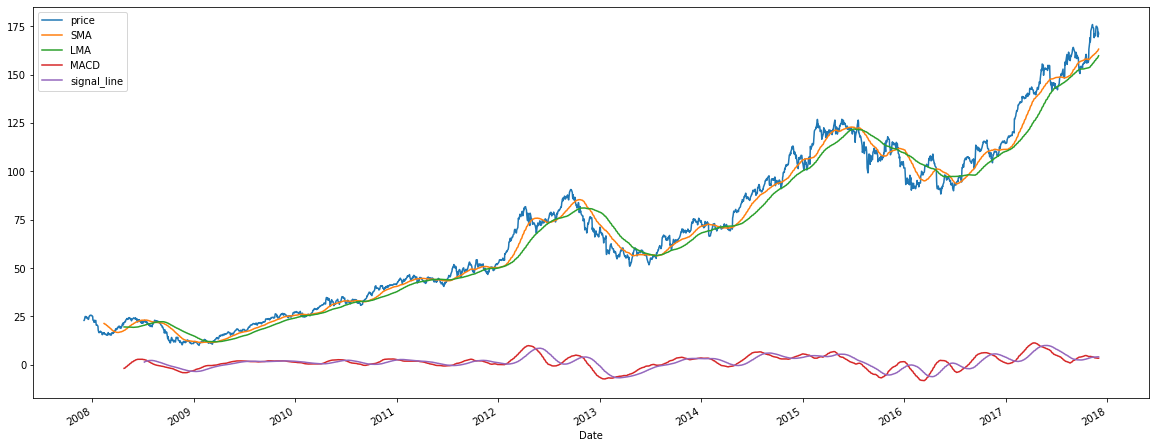

In [16]:
macd_signal_line.plot(figsize=(20,8))

<AxesSubplot:xlabel='Date'>

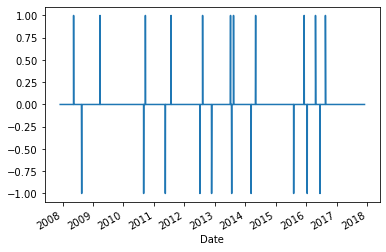

In [17]:
signals['buy_sell'].plot()

### Plot

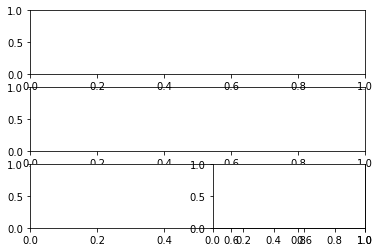

In [45]:
graph = plt.figure()
graph.add_subplot(312)
graph.add_subplot(311)
graph.add_subplot(313)
graph.add_subplot(326)
plt.show()

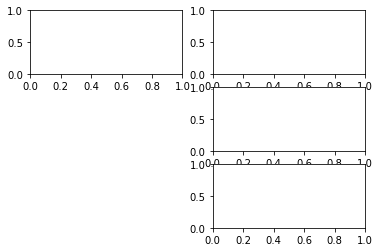

In [50]:
graph = plt.figure()
graph.add_subplot(321)
graph.add_subplot(322)
graph.add_subplot(324)
graph.add_subplot(326)
plt.show()

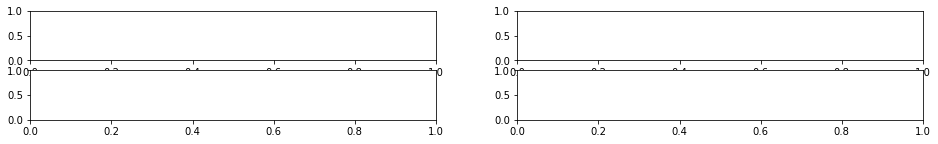

In [55]:
fig = plt.figure(figsize=(16,2))
fig.add_subplot(221)
fig.add_subplot(222)
fig.add_subplot(223)
fig.add_subplot(224)
plt.show()

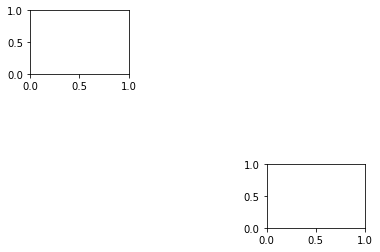

In [12]:
fig = plt.figure()
fig.add_subplot(331)
fig.add_subplot(339)
plt.show()

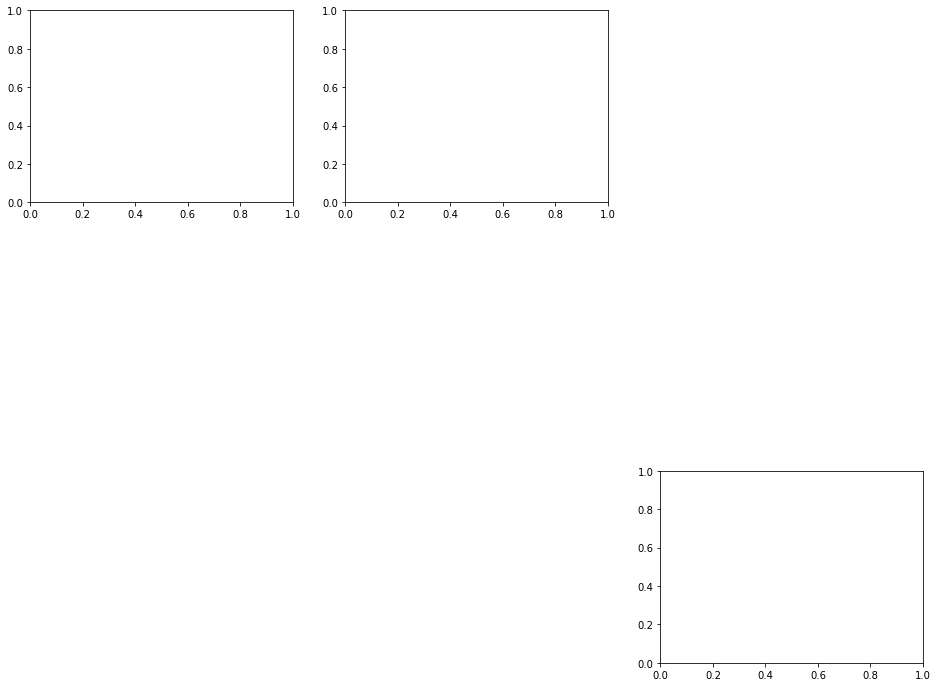

In [13]:
graph = plt.figure(figsize=(16,12))
graph.add_subplot(331)
graph.add_subplot(332)
graph.add_subplot(339)
plt.show()

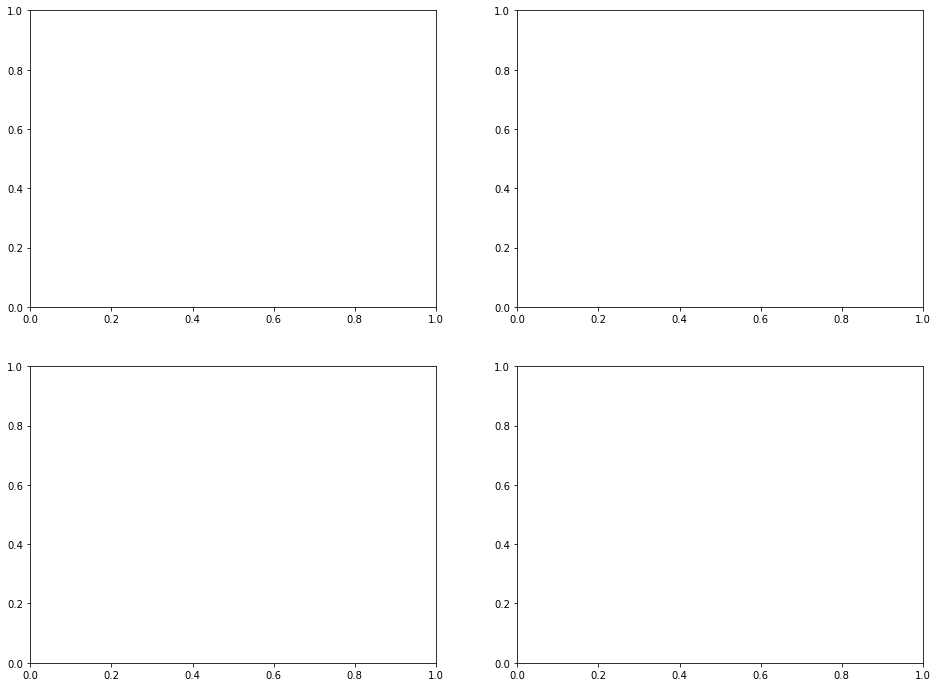

In [14]:
# fig = plt.figure()
fig = plt.figure(figsize=(16, 12))
fig.add_subplot(221)   #top left
fig.add_subplot(222)   #top right
fig.add_subplot(223)   #bottom left
fig.add_subplot(224)   #bottom right 
plt.show()

In [15]:
### Plotting 

In [57]:
macd_signal_line


,price,SMA,LMA,MACD,signal_line
Date,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-11-27,174.090000,162.113916,158.599197,3.514719,4.170141
2017-11-28,173.070000,162.377716,158.894820,3.482896,4.171084
2017-11-29,169.480000,162.593916,159.168088,3.425828,4.167339


In [58]:
signals

,temp,price,buy_sell
Date,,,
2007-12-03,0,22.986003,NaN
2007-12-04,0,23.108091,0.0
2007-12-05,0,23.839335,0.0
2007-12-06,0,24.411582,0.0
2007-12-07,0,24.970258,0.0
...,...,...,...
2017-11-27,0,174.090000,0.0
2017-11-28,0,173.070000,0.0
2017-11-29,0,169.480000,0.0


In [59]:
signals.columns

Index(['temp', 'price', 'buy_sell'], dtype='object')

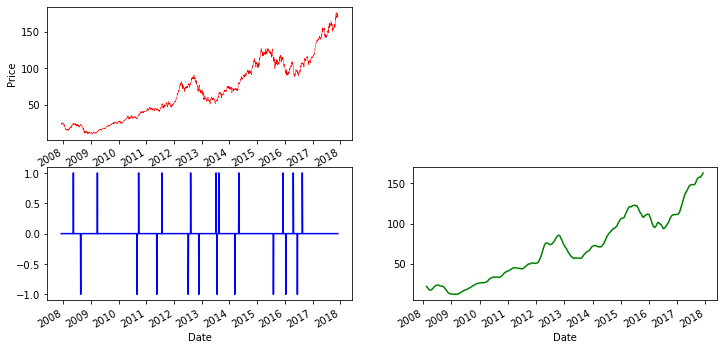

In [66]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(221, ylabel='Price')
macd_signal_line['price'].plot(ax=ax1,color = 'r', lw = 0.5)

ax2 = fig.add_subplot(223)
signals['buy_sell'].plot(ax=ax2, color = 'b')
var = fig.add_subplot(224)
macd_signal_line['SMA'].plot(ax=var, color = 'g')
plt.show()

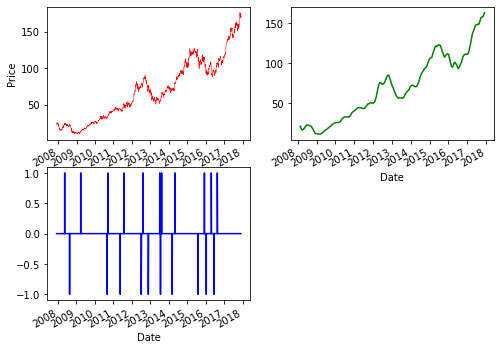

In [60]:
# putting all above together
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(221, ylabel='Price')
macd_signal_line['price'].plot(ax=ax1,color = 'r', lw = 0.5)
ax2 = fig.add_subplot(222)
macd_signal_line['SMA'].plot(ax=ax2, color = 'g')
ax3 = fig.add_subplot(223)
signals['buy_sell'].plot(ax=ax3, color = 'b')
plt.show()

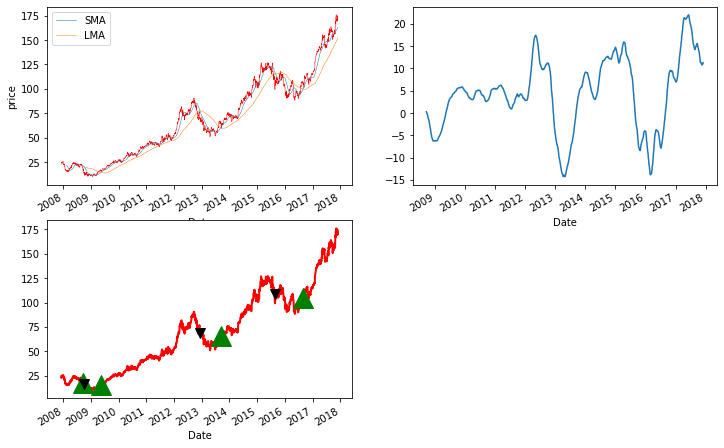

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221, ylabel='price')
macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 0.5)
macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=0.5)
ax2 = fig.add_subplot(222)
macd_signal_line['MACD'].plot(ax = ax2)
ax3 = fig.add_subplot(223)
macd_signal_line['price'].plot(ax=ax3, color = 'r', lw = 2.)
# macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
ax3.plot(macd_signal_line.loc[signals.buy_sell ==1.0].index, macd_signal_line.price[signals.buy_sell == 1.0], '^', markersize=20, color = 'g')
ax3.plot(macd_signal_line.loc[signals.buy_sell == -1.0].index, macd_signal_line.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
plt.show()


In [73]:
macd_signal_line.head()

,price,SMA,LMA,MACD,signal_line
Date,,,,,
2007-12-03,22.986003,NaN,NaN,NaN,NaN
2007-12-04,23.108091,NaN,NaN,NaN,NaN
2007-12-05,23.839335,NaN,NaN,NaN,NaN
2007-12-06,24.411582,NaN,NaN,NaN,NaN
2007-12-07,24.970258,NaN,NaN,NaN,NaN


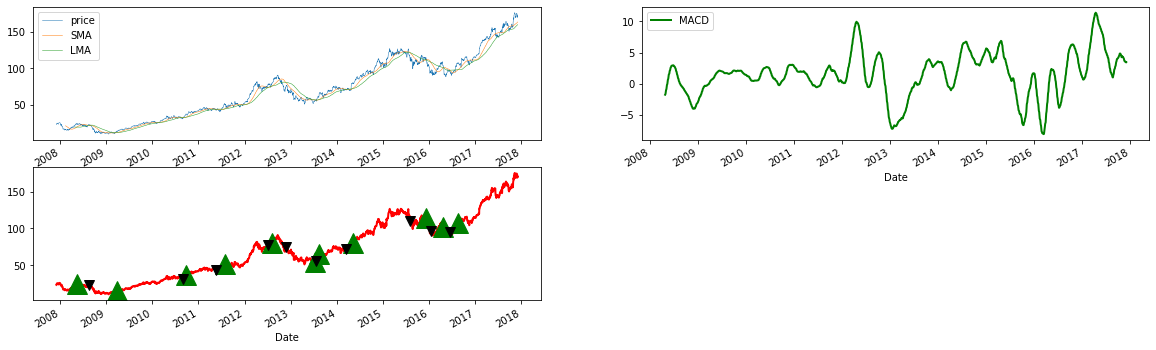

In [83]:
fig = plt.figure(figsize=(20,6))
graph1 = fig.add_subplot(221) 
# macd_signal_line['price'].plot(ax=graph1, color = 'r', lw = 0.5)
macd_signal_line[['price', 'SMA', 'LMA']].plot(ax = graph1, lw=0.5)
graph2 = fig.add_subplot(222)
macd_signal_line[['MACD']].plot(ax = graph2, lw=2, color = 'g')
graph3 = fig.add_subplot(223)
macd_signal_line['price'].plot(ax=graph3, color = 'r', lw = 2.)
graph3.plot(macd_signal_line.loc[signals.buy_sell ==1.0].index, macd_signal_line.price[signals.buy_sell == 1.0], '^', markersize=20, color = 'g')
graph3.plot(macd_signal_line.loc[signals.buy_sell == -1.0].index, macd_signal_line.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
plt.show()

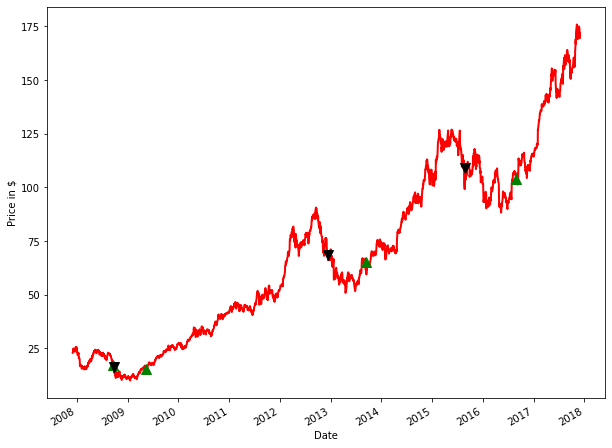

In [20]:
# putting all above together
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(111, ylabel='Price in $')
macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 2.)
# macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
ax1.plot(macd_signal_line.loc[signals.buy_sell ==1.0].index, macd_signal_line.price[signals.buy_sell == 1.0] , '^', markersize=10, color = 'g')
ax1.plot(macd_signal_line.loc[signals.buy_sell == -1.0].index, macd_signal_line.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
plt.show()

In [84]:
def plot_macd_buy_sell(macd_signal_line, signals, symbol):
    """
    Plot for macd price, shortma, longma, buy signal, sell signal
    Input: data frame with all above information
    Output: None
    """
    # putting all above together
    fig = plt.figure(figsize=(12,8))
    plt.title(symbol)
    #fig1
    ax1 = fig.add_subplot(411, ylabel='Price in $')
    macd_signal_line['price'].plot(ax=ax1, color = 'r', lw = 2.)
    macd_signal_line[['SMA', 'LMA']].plot(ax = ax1, lw=2.)
    #fig2
    ax2 = fig.add_subplot(412, ylabel = 'buy signal')
    signals['price'].plot(ax=ax2, color = 'r', lw = 2.)
    ax2.plot(signals.loc[signals.buy_sell == 1.0].index, signals.price[signals.buy_sell == 1.0], '^', markersize=10, color = 'm')
    #fig3
    ax3 = fig.add_subplot(413, ylabel = 'sell signal')
    signals['price'].plot(ax=ax3, color = 'r', lw = 2.)
    ax3.plot(signals.loc[signals.buy_sell == -1.0].index, signals.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
    #fig4
    ax4 = fig.add_subplot(414, ylabel='buy sell signal')
    signals['price'].plot(ax=ax4, color = 'r', lw = 2.)
    # add buy sell
    ax4.plot(signals.loc[signals.buy_sell == 1.0].index, signals.price[signals.buy_sell == 1.0], '^', markersize=10, color = 'g')
    ax4.plot(signals.loc[signals.buy_sell == -1.0].index, signals.price[signals.buy_sell == -1.0], 'v', markersize=10, color='k')
    #
    plt.show()

In [22]:
help(plot_macd_buy_sell)

Help on function plot_macd_buy_sell in module __main__:

plot_macd_buy_sell(macd_signal_line, signals, symbol)
    Plot for macd price, shortma, longma, buy signal, sell signal
    Input: data frame with all above information
    Output: None



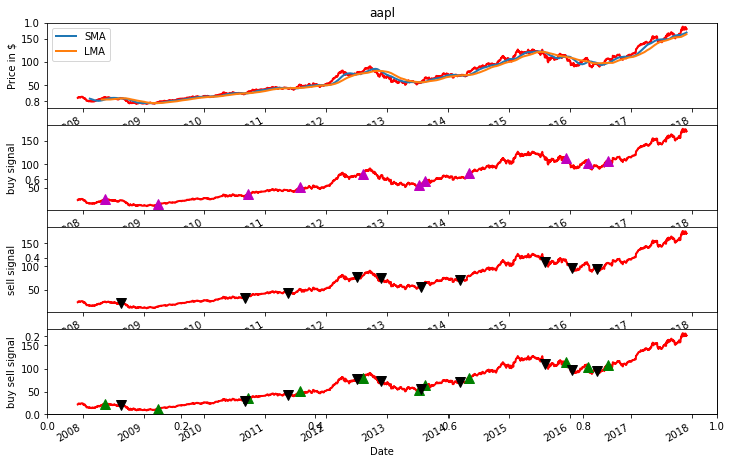

In [85]:
plot_macd_buy_sell(macd_signal_line, signals, 'aapl')

In [ ]:
macd : 1 000000 -1 00000 1 0000 -1 0000
    
    
RSI: 1 000  1 0000 1 0000 1 000 -1